># 합성곱층

- Convolution은 함수를 조금씩 평행이동하면서 곱하는 계산을 의미
- 머신러닝 외에도 사진 앱에서 필터를 만들 때에도 자주 사용하는 계산임
- CNN도 사실 합성곱을 사용해 이미지에 필터를 적용하는 과정 중 하나로 이해할 수 있음

___
>## 이미지 필터란?

- 스마트폰에도 탑재되어 있는 이미지 필터 기능은 다음과 같은 과정을 거쳐 실행:  
    1. 입력화소에서 하나에 초점을 맞춤  
    2. 해당 화소 주변의 화소값에 필터 계수를 곱함  
    3. 곱한 결과를 더한 후 (변환 후) 화소로 저장
    4. 옆 화소로 이동하여 위 과정을 반복


- 다음 코드는 MNIST 이미지에 3x3 필터를 적용하는 예제임

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


Text(0.5, 1.05, 'filtered image\n')

<Figure size 432x288 with 0 Axes>

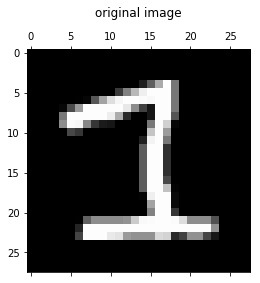

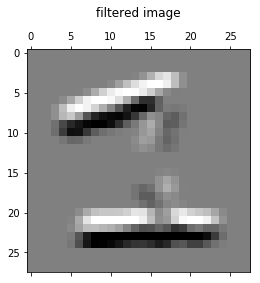

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist/")

# input 이미지 호출하여 (28,28) shape으로 변환
img_in = mnist.test.images[3906].reshape(28,28)

# 3x3 필터 생성
filt = [[-1, -2, -1],
       [0, 0, 0],
       [1, 2, 1]]

def apply_filter(img, filt):
    # 0으로 이루어진 28x28 배열 생성
    img_out = np.zeros((28, 28))
    
    # 필터 크기를 감안하여, range(0, 28) 대신 가장자리를 제외한 (1, 27) 범위 사용
    for y in range(1, 27):
        for x in range(1, 27):
            # 원본 이미지를 기준점으로부터 3x3 영역 추출
            im = img[y-1:y+2, x-1:x+2]
            # 필터곱의 합을 img_out의 기준 화소 위치에 업데이트
            img_out[y,x] = np.multiply(filt, im).sum()
            
    return img_out

img = apply_filter(img_in, filt)

plt.gray()
plt.matshow(img_in)
plt.title('original image\n')
plt.matshow(img)
plt.title('filtered image\n')

___
>## 이미지 필터로 특징 추출하기

- 과거 DNN으로 추정할 떄에는 화소의 진하고 연함에 지나지 않았던 특징량과는 달리, '양옆에 다른 화소가 어느 정도 있는가'라는 정보가 추가
- 필터에 따라 가로, 세로 혹은 대각선 방향을 강조하는 필터를 선택하여 적용 가능
- CNN에서는 학습을 통해 위 3x3 필터의 값을 손실이 적어지는 방향으로 조정(특징을 잘 추출하는)

___
>## 합성곱층의 학습

- TensorFlow를 통해 CNN을 쉽게 학습 가능
- [[1, 2, 3], [4, 5, 6], [7, 8, 9]] 행렬에 필터(가중치 w)를 곱하는 계산하는 과정을 표현하자면 다음과 같음:

In [13]:
import tensorflow as tf

with tf.Graph().as_default():
    x = tf.constant([[1,2,3],
                    [4,5,6],
                    [7,8,9]], shape = [1, 9])
    w = tf.constant([[-1,-2,-1],
                    [0, 0, 0],
                    [1, 2, 1]], shape = [9, 1])
    op = tf.matmul(x, w)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result = sess.run(op)
print(result)

[[24]]


- 여기서 `tf.matmul`은 행렬곱을 수행하기 때문에 reshape 필요(혹은 각 원소를 곱하여 합산하도록 수식 변경 필요)

In [31]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
W = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

print(np.matmul(X,W))
print(np.matmul(X,W).sum())
print('='*20)
print(np.matmul(X.reshape(1, 9), W.reshape(9,1)))

[[2 4 2]
 [2 4 2]
 [3 6 3]]
28
[[25]]


- 위 예제에서는 가중치 필터 w를 상수로 보았지만, `tf.Variable`로 이미지 필터(nxn), 채널 수, 필터 수를 설정하여 학습 수행
- 예를 들어 이미지의 경우 RGB 3개 채널이 있으므로 채널 수를 3개로 설정:

In [ ]:
# 예제로 가중치를 0으로 초기화 하지만, 일반적으로는 0으로 초기화 하지 않음

# 3x3필터, 1채널, 10개필터
tf.Variable(tf.zeros([3, 3, 1, 10]))

# 5x5필터, 3채널, 20개필터
tf.Variable(tf.zeros([5, 5, 3, 20]))